In [317]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [318]:
df = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding='latin-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [319]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,3493,3493,DLAGU8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,3493,3481,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,3493,13,LERMA SANTIAGO PACIFICO,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,3493,32,VERACRUZ DE IGNACIO DE LA LLAVE,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,3493,755,ACAPULCO DE JUAREZ,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUENCA,3492,521,YUCATAN (RESTO DE RH 32),101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUERPO DE AGUA,3479,1067,OCEANO PACIFICO,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO,3493,23,LOTICO,1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,3479,27,RIO,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,3493.0,NaN,NaN,NaN,-100.359969,6.122773,-117.12403,-103.88231,-99.79553,-96.86023,-86.73215


# Limpieza de base de datos.


In [320]:
df[df['CLAVE'].isna()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
3493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropear los registros que tengan todos los valores NA

In [321]:
df = df.dropna(how='all') 

Estandarización de datos no disponibles, los datos no disponibles están marcados como ND

In [322]:
df = df.replace(['ND', ''], np.nan)

Las columnas TOX_D_48_FON_UT, CALIDAD_TOX_D_48_FON, TOX_FIS_FON_15_UT, CALIDAD_TOX_FIS_FON_15 no contienen ningún dato, por lo que se eliminan.

In [323]:
df = df.drop(['TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON', 'TOX_FIS_FON_15_UT', 'CALIDAD_TOX_FIS_FON_15'], axis=1)

Estandarizar los campos que son númericos y tienen valores del tipo <1, <2, <3, <10 con el valor indicado en el campo

In [324]:
cols_menor_que = [
  'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'E_COLI_NMP_100mL', 
  'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 
  'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',
  'COLI_FEC_NMP_100mL'
]
df[cols_menor_que] = df[cols_menor_que].replace({'<1':1, '<2':2, '<3': 3, '<10': 10})

Las variables si y no se reemplazaran por 1 y 0 respectivamente.

In [325]:
cols_si_no = [
  'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
  'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD', 'CUMPLE_CON_TOX',
]
df[cols_si_no] = df[cols_si_no].replace({'SI':1, 'NO':0})


Las columnas de calidad que constan de Excelente, Buena calidad, Aceptable, Contaminada, Fuertemente contaminada se reemplazaran de la siguiente manera:
* Excelente = 5
* Buena calidad = 4
* Aceptable = 3
* Contaminada = 2
* Fuertemente contaminada = 1

In [326]:
cols_calidad = [
  'CALIDAD_COLI_FEC', 
  'CALIDAD_DBO', 
  'CALIDAD_DQO', 
  'CALIDAD_E_COLI', 
  'CALIDAD_ENTEROC', 
  'CALIDAD_OD_PORC', 
  'CALIDAD_OD_PORC_FON', 
  'CALIDAD_OD_PORC_MED', 
  'CALIDAD_OD_PORC_SUP', 
  'CALIDAD_SST', 
]
df[cols_calidad] = df[cols_calidad].replace({
  'Excelente': 5,
  'Buena calidad': 4,
  'Aceptable': 3,
  'Contaminada': 2,
  'Fuertemente contaminada': 1,
})

Las columnas de toxicidad que constan de No toxico, Toxicidad baja, Toxicidad moderada, Toxicidad alta se reemplazaran de la siguiente manera:

* No Toxico = 1 
* Toxicidad baja = 2
* Toxicidad moderada = 3 
* Toxicidad alta = 4

In [327]:
df[['CALIDAD_TOX_D_48']].value_counts()

CALIDAD_TOX_D_48  
No Toxico             1729
Toxicidad moderada      52
Toxicidad baja          31
Toxicidad alta           4
dtype: int64

In [328]:
cols_toxicidad = [
  'CALIDAD_TOX_D_48',
  'CALIDAD_TOX_V_15',
  'CALIDAD TOX_D_48_SUP',
  'CALIDAD_TOX_FIS_SUP_15',
]

df[cols_toxicidad] = df[cols_toxicidad].replace({
  'No Toxico' : 1 ,
  'Toxicidad baja' : 2,
  'Toxicidad moderada' : 3 ,
  'Toxicidad alta' : 4,
})


Reemplazar los valores del semáforo de calidad de agua con los siguientes valores:
* Verde = 1
* Amarillo = 2
* Rojo = 3


In [329]:
df['SEMAFORO'].value_counts()

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64

In [330]:
df['SEMAFORO'] = df['SEMAFORO'].replace({
  'Verde' : 1 ,
  'Amarillo' : 2,
  'Rojo' : 3 ,
})

Revisión de tipos de datos

In [331]:
flotantes = [
  'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'E_COLI_NMP_100mL', 
  'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 
  'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',
  'COLI_FEC_NMP_100mL'
]
df[flotantes] = df[flotantes].astype(float)

Los valores de enteros no se pueden convertir a int hasta que se eliminen los valores ND, por lo pronto no se hará nada con los tipos de datos.

In [332]:
enteros = [
  'CALIDAD_TOX_D_48',
  'CALIDAD_TOX_V_15',
  'CALIDAD TOX_D_48_SUP',
  'CALIDAD_TOX_FIS_SUP_15',
]

Revisión de valores nulos

In [333]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)


CALIDAD_OD_PORC_MED       86.057830
OD_PORC_MED               86.057830
CALIDAD TOX_D_48_SUP      78.184941
TOX_D_48_SUP_UT           78.184941
ENTEROC_NMP_100mL         74.119668
CUMPLE_CON_ENTEROC        74.119668
CALIDAD_ENTEROC           74.119668
CALIDAD_OD_PORC_FON       72.917263
OD_PORC_FON               72.917263
CALIDAD_OD_PORC_SUP       53.650157
OD_PORC_SUP               53.650157
CALIDAD_TOX_FIS_SUP_15    52.075580
TOX_FIS_SUP_15_UT         52.075580
OD_PORC                   48.554251
CALIDAD_OD_PORC           48.554251
CALIDAD_TOX_D_48          48.010306
TOX_D_48_UT               48.010306
CALIDAD_TOX_V_15          47.924420
TOX_V_15_UT               47.924420
CONTAMINANTES             36.272545
CALIDAD_DQO               26.109362
DQO_mg/L                  26.109362
CALIDAD_DBO               26.109362
DBO_mg/L                  26.109362
CUMPLE_CON_DBO            26.109362
CUMPLE_CON_DQO            26.109362
CUMPLE_CON_CF             26.080733
CUMPLE_CON_E_COLI         26

Las columnas con mas del 50% de valores nulos se eliminan

In [334]:
# drop columns with more than 50% missing values
more_than_50_missing = percent_missing[percent_missing > 50].index
print(more_than_50_missing.shape)
df = df.drop(more_than_50_missing, axis=1)



(13,)


El resto revisar si son continuas o discretas

Las continuas se reemplazan con la media

Las discretas se reemplazan con la moda

In [335]:
numericas_discretas = cols_si_no + cols_calidad + cols_toxicidad + ['SEMAFORO']
numericas_discretas = [col for col in numericas_discretas if col in df.columns]

df[numericas_discretas].median()

# reemplazar los valores faltantes con la moda
df[numericas_discretas] = df[numericas_discretas].fillna(df[numericas_discretas].median())


In [336]:
numericas_continuas = flotantes  
numericas_continuas = [col for col in numericas_continuas if col in df.columns]

df[numericas_continuas].mean()
df[numericas_continuas] = df[numericas_continuas].fillna(df[numericas_continuas].mean())

In [337]:
df[['CUENCA', 'TIPO', 'SUBTIPO', 'CUERPO DE AGUA']].describe()

,CUENCA,TIPO,SUBTIPO,CUERPO DE AGUA
count,3492,3493,3479,3479
unique,521,23,27,1067
top,YUCATAN (RESTO DE RH 32),LOTICO,RIO,OCEANO PACIFICO
freq,101,1263,1478,139


En cuenca, subtipo y cuerpo de agua quedan pocos valores nulos, por lo que se eliminan los registros/filas que los contengan.

In [338]:
df = df[df['CUENCA'].notna()]
df = df[df['SUBTIPO'].notna()]
df = df[df['CUERPO DE AGUA'].notna()]

CONTAMINANTES es un resumen de los contaminantes y es un agrupado de valores eliminamos la columna

In [339]:
df = df.drop(['CONTAMINANTES'], axis=1)

In [340]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)


CLAVE                  0.0
CALIDAD_COLI_FEC       0.0
CALIDAD_E_COLI         0.0
OD_PORC                0.0
CALIDAD_OD_PORC        0.0
TOX_D_48_UT            0.0
CALIDAD_TOX_D_48       0.0
TOX_V_15_UT            0.0
CALIDAD_TOX_V_15       0.0
SEMAFORO               0.0
CUMPLE_CON_DBO         0.0
CUMPLE_CON_DQO         0.0
CUMPLE_CON_SST         0.0
CUMPLE_CON_CF          0.0
CUMPLE_CON_E_COLI      0.0
CUMPLE_CON_OD          0.0
CUMPLE_CON_TOX         0.0
E_COLI_NMP_100mL       0.0
COLI_FEC_NMP_100mL     0.0
SITIO                  0.0
CALIDAD_SST            0.0
ORGANISMO_DE_CUENCA    0.0
ESTADO                 0.0
MUNICIPIO              0.0
CUENCA                 0.0
CUERPO DE AGUA         0.0
TIPO                   0.0
SUBTIPO                0.0
LONGITUD               0.0
LATITUD                0.0
PERIODO                0.0
DBO_mg/L               0.0
CALIDAD_DBO            0.0
DQO_mg/L               0.0
CALIDAD_DQO            0.0
SST_mg/L               0.0
GRUPO                  0.0
d

Revision de tipo de datos continuación, convertir los datos enteros a int

In [341]:
df[numericas_discretas] = df[numericas_discretas].astype(int)
df[['PERIODO']] = df[['PERIODO']].astype(int)

In [342]:
df.dtypes

CLAVE                   object
SITIO                   object
ORGANISMO_DE_CUENCA     object
ESTADO                  object
MUNICIPIO               object
CUENCA                  object
CUERPO DE AGUA          object
TIPO                    object
SUBTIPO                 object
LONGITUD               float64
LATITUD                float64
PERIODO                  int64
DBO_mg/L               float64
CALIDAD_DBO              int64
DQO_mg/L               float64
CALIDAD_DQO              int64
SST_mg/L               float64
CALIDAD_SST              int64
COLI_FEC_NMP_100mL     float64
CALIDAD_COLI_FEC         int64
E_COLI_NMP_100mL       float64
CALIDAD_E_COLI           int64
OD_PORC                float64
CALIDAD_OD_PORC          int64
TOX_D_48_UT            float64
CALIDAD_TOX_D_48         int64
TOX_V_15_UT            float64
CALIDAD_TOX_V_15         int64
SEMAFORO                 int64
CUMPLE_CON_DBO           int64
CUMPLE_CON_DQO           int64
CUMPLE_CON_SST           int64
CUMPLE_C

# Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):


In [343]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,3478.0,-100.391758,6.114533e+00,-117.12403,-103.903347,-99.814090,-96.905730,-8.673215e+01
LATITUD,3478.0,21.060174,3.896891e+00,14.53491,18.422230,20.158675,22.843522,3.270650e+01
PERIODO,3478.0,2020.000000,0.000000e+00,2020.00000,2020.000000,2020.000000,2020.000000,2.020000e+03
DBO_mg/L,3478.0,16.946403,5.610418e+01,2.00000,2.000000,7.190000,16.886481,1.500000e+03
CALIDAD_DBO,3478.0,4.278896,1.070088e+00,1.00000,3.000000,5.000000,5.000000,5.000000e+00
DQO_mg/L,3478.0,64.531412,1.290239e+02,10.00000,16.880000,44.710000,64.332985,2.871250e+03
CALIDAD_DQO,3478.0,3.140311,1.066596e+00,1.00000,2.000000,3.000000,4.000000,5.000000e+00
SST_mg/L,3478.0,102.517492,4.425220e+02,10.00000,10.000000,24.525000,58.000000,9.430000e+03
CALIDAD_SST,3478.0,4.153249,1.114565e+00,1.00000,4.000000,5.000000,5.000000,5.000000e+00
COLI_FEC_NMP_100mL,3478.0,96070.786916,1.007063e+06,3.00000,905.000000,11000.000000,95688.808675,2.419600e+07


![Interpretación boxplot](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg)



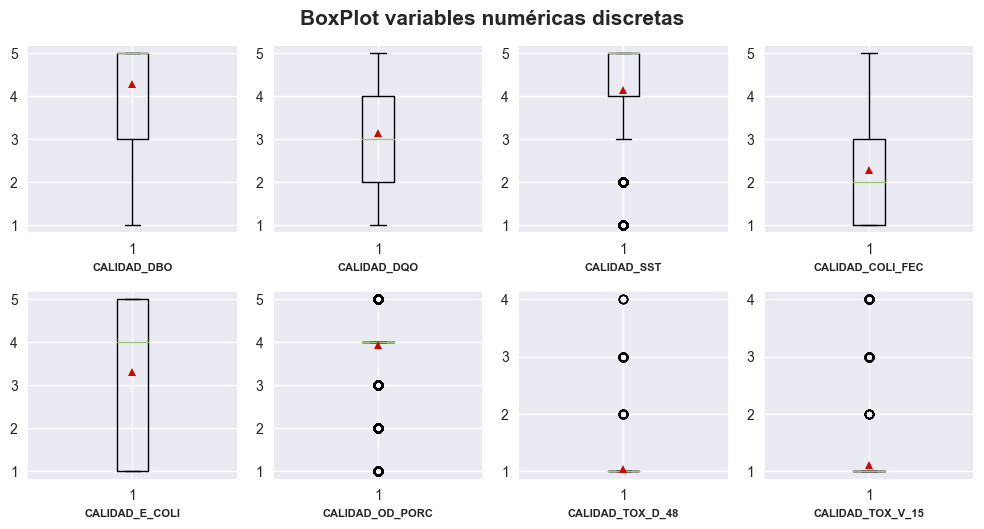

In [344]:
# num_var = df.select_dtypes(include= 'number').columns.tolist()
numericas_discretas = [
  'CALIDAD_DBO', 'CALIDAD_DQO', 'CALIDAD_SST', 'CALIDAD_COLI_FEC', 
  'CALIDAD_E_COLI', 'CALIDAD_OD_PORC', 'CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15'
]

plt.figure(figsize=(10,10))
plt.suptitle('BoxPlot variables numéricas discretas', fontsize=15, weight='bold')

for i, var in enumerate(numericas_discretas):
  plt.subplot(4,4,1+i)
  plt.boxplot(df[var].dropna(), showmeans=True)
  plt.xlabel(var,fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

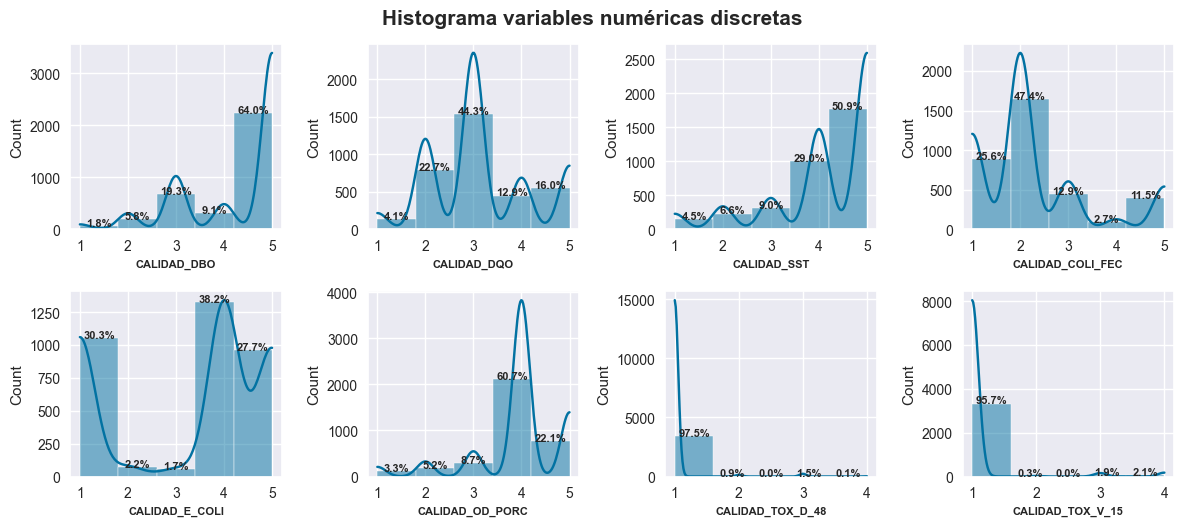

In [345]:
plt.figure(figsize=(12,10))
plt.suptitle('Histograma variables numéricas discretas', fontsize=15, weight='bold')
for i, var in enumerate(numericas_discretas):
  plt.subplot(4,4,1+i)
  ax = sns.histplot(df[var].dropna(), kde=True, bins=5)

  total = len(df[var].dropna())
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(percentage, (x, y), ha='center', fontsize=8, weight='bold')

  plt.xlabel(var,fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

*NOTA*: algunas de las variables tienen valores menores al $5\%$ de la muestra, habría que agruparlas en otra categoría

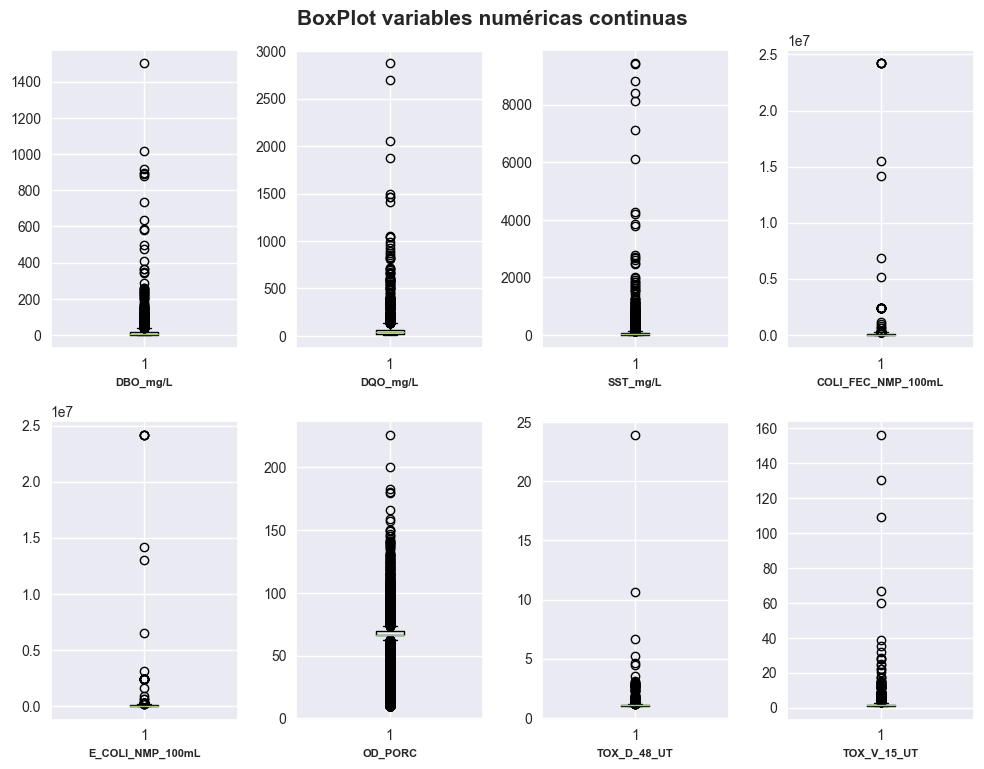

In [346]:
numericas_continuas = [
  'DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL',
  'E_COLI_NMP_100mL','OD_PORC','TOX_D_48_UT','TOX_V_15_UT',
]

plt.figure(figsize=(10,15))
plt.suptitle('BoxPlot variables numéricas continuas', fontsize=15, weight='bold')

for i, var in enumerate(numericas_continuas):
  plt.subplot(4,4,1+i)
  plt.boxplot(df[var].dropna())
  plt.xlabel(var,fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

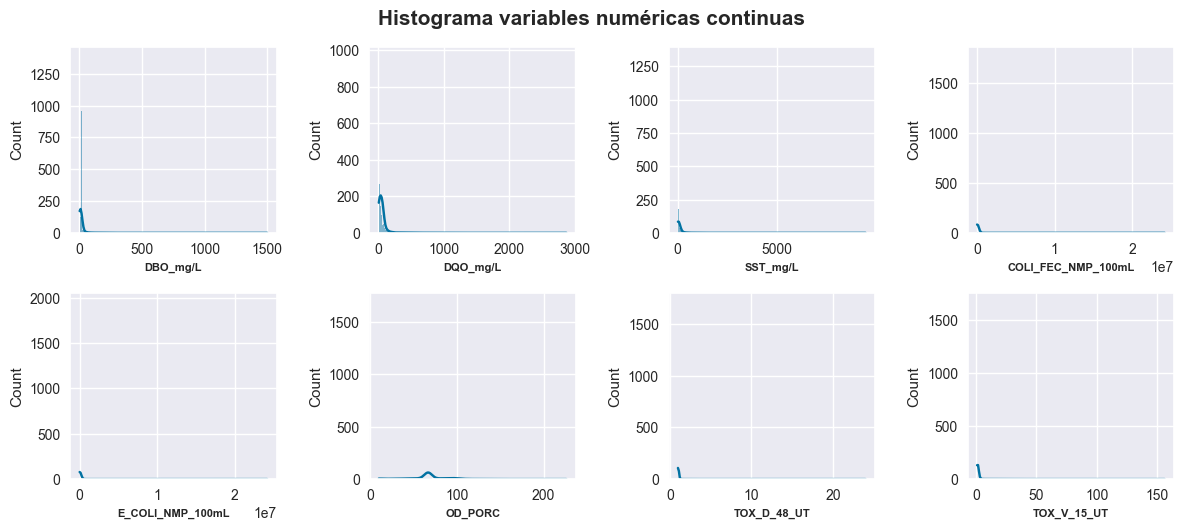

In [347]:
plt.figure(figsize=(12,10))
plt.suptitle('Histograma variables numéricas continuas', fontsize=15, weight='bold')
for i, var in enumerate(numericas_continuas):
  plt.subplot(4,4,1+i)
  ax = sns.histplot(df[var].dropna(), kde=True)
  plt.xlabel(var,fontsize=8, weight='bold')

plt.tight_layout()
plt.show()


# Identificando tendencias centrales promedio, media y mediana de los datos. 


In [348]:
data = {
  'promedio': df.mean(numeric_only=True),
  'media': df.median(numeric_only=True),
  'stddev': df.std(numeric_only=True).round(2)
}

tendencias_centrales = pd.DataFrame(data)
tendencias_centrales



,promedio,media,stddev
LONGITUD,-100.391758,-99.814090,6.11
LATITUD,21.060174,20.158675,3.90
PERIODO,2020.000000,2020.000000,0.00
DBO_mg/L,16.946403,7.190000,56.10
CALIDAD_DBO,4.278896,5.000000,1.07
DQO_mg/L,64.531412,44.710000,129.02
CALIDAD_DQO,3.140311,3.000000,1.07
SST_mg/L,102.517492,24.525000,442.52
CALIDAD_SST,4.153249,5.000000,1.11
COLI_FEC_NMP_100mL,96070.786916,11000.000000,1007062.68


# Identificar medidas de dispersión, máximo, mínimo .


In [349]:
data = {
  'minimos': df.min(numeric_only=True).round(2),
  'maximos': df.max(numeric_only=True).round(2),
}

medidas_dispersion = pd.DataFrame(data)
medidas_dispersion

,minimos,maximos
LONGITUD,-117.12,-86.73
LATITUD,14.53,32.71
PERIODO,2020.00,2020.00
DBO_mg/L,2.00,1500.00
CALIDAD_DBO,1.00,5.00
DQO_mg/L,10.00,2871.25
CALIDAD_DQO,1.00,5.00
SST_mg/L,10.00,9430.00
CALIDAD_SST,1.00,5.00
COLI_FEC_NMP_100mL,3.00,24196000.00


# Identificar medidas de posición no centrales , los cuartiles , outliers.   


In [350]:
df.quantile([0.25, 0.5, 0.75], numeric_only=True).T

,0.25,0.50,0.75
LONGITUD,-103.903347,-99.814090,-96.905730
LATITUD,18.422230,20.158675,22.843522
PERIODO,2020.000000,2020.000000,2020.000000
DBO_mg/L,2.000000,7.190000,16.886481
CALIDAD_DBO,3.000000,5.000000,5.000000
DQO_mg/L,16.880000,44.710000,64.332985
CALIDAD_DQO,2.000000,3.000000,4.000000
SST_mg/L,10.000000,24.525000,58.000000
CALIDAD_SST,4.000000,5.000000,5.000000
COLI_FEC_NMP_100mL,905.000000,11000.000000,95688.808675


In [351]:
# # list outliers
# def outliers_iqr(data):
#   q1, q3 = np.percentile(data, [25, 75])
#   iqr = q3 - q1
#   lower_bound = q1 - (iqr * 1.5)
#   upper_bound = q3 + (iqr * 1.5)
#   return np.where((data > upper_bound) | (data < lower_bound))

# outliers = outliers_iqr(df.select_dtypes(include= 'number'))
# outliers = pd.DataFrame(outliers, columns=['indice', 'columna'])

cols = df.select_dtypes(include= 'number').columns.tolist()
# q1 = df[cols].quantile(0.25)
# q3 = df[cols].quantile(0.75)
# iqr = q3 - q1
# # find outliers
# outliers = df[  
#   (
#     (df[cols] < (q1 - 1.5 * iqr)) |
#     (df[cols] > (q3 + 1.5 * iqr))
#   )
# ]
# outliers

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(df[numericas_continuas])
print(outliers.shape)

outliers = find_outliers_IQR(df[numericas_discretas])
print(outliers.shape)

(3478, 8)
(3478, 8)


# Identificar correlaciones.


<AxesSubplot: >

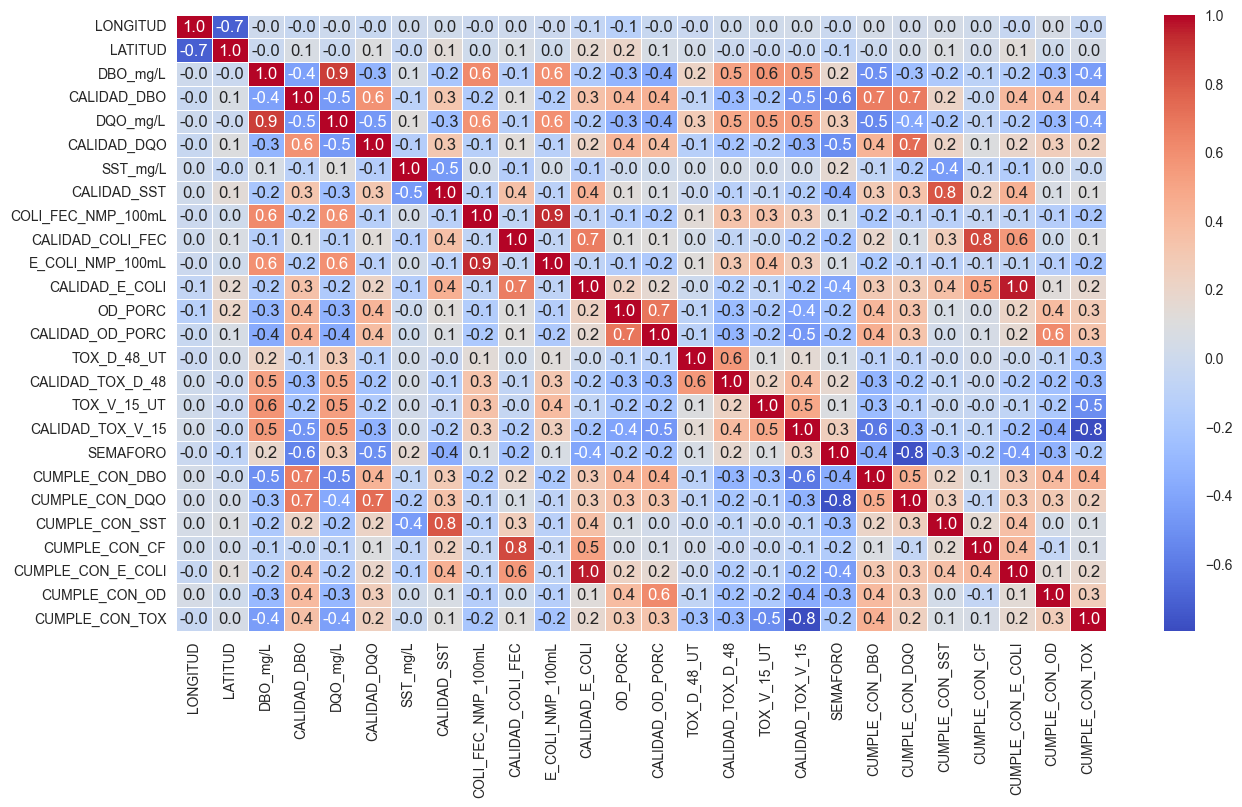

In [352]:
f,ax = plt.subplots(figsize=(15, 8))
corr  = df.loc[:, df.columns != 'PERIODO'].select_dtypes(include= 'number').corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="coolwarm")

# Preparar los datos 


# Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.


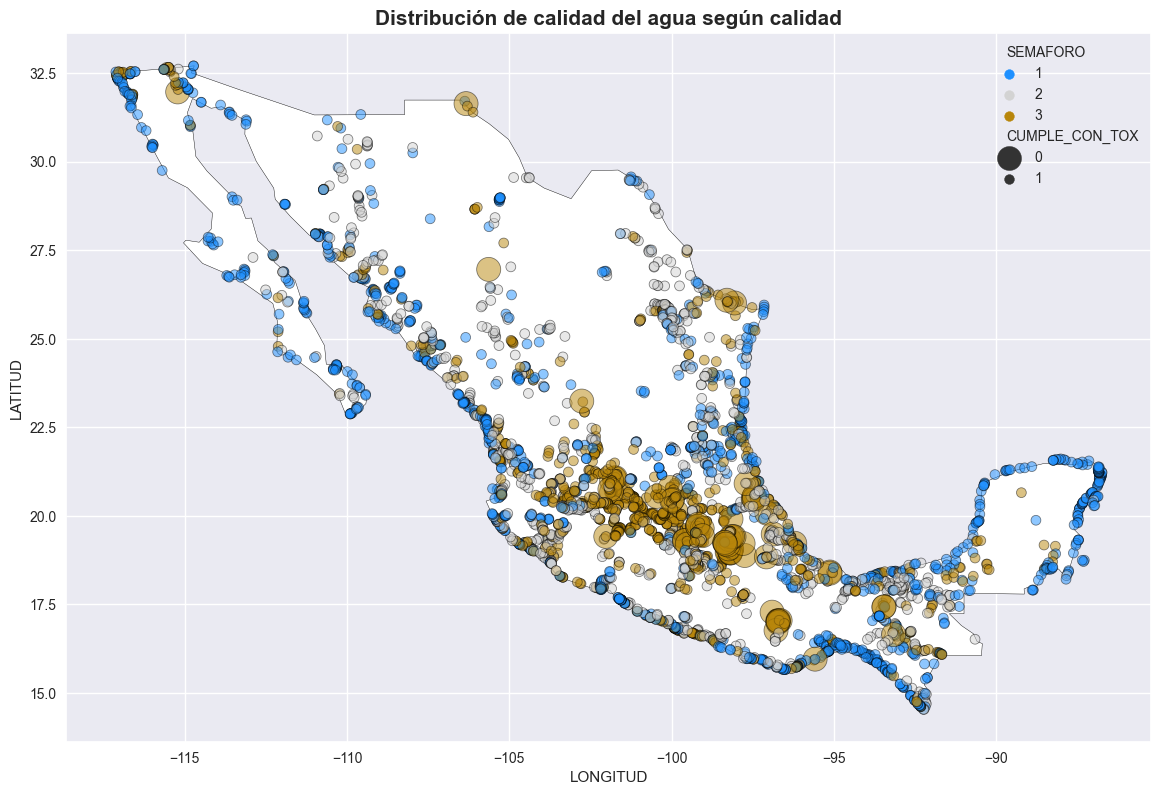

In [422]:
fig, gax = plt.subplots(figsize=(14, 10))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(
  x='LONGITUD', 
  y='LATITUD', 
  data=df, 
  hue='SEMAFORO', 
  palette=['dodgerblue', 'lightgray', 'darkgoldenrod'], 
  # palette='cool', 
  alpha=0.5, 
  size='CUMPLE_CON_TOX', 
  sizes=(50, 300), 
  edgecolor='black'
)
plt.title('Distribución de calidad del agua según calidad', fontsize=15, weight='bold')
plt.show()

In [354]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [374]:
# nuestras X son las coordenadas
X = df[['LONGITUD', 'LATITUD', 'SEMAFORO', 'CUMPLE_CON_TOX']]
X

,LONGITUD,LATITUD,SEMAFORO,CUMPLE_CON_TOX
0,-102.33911,22.24730,3,1
1,-109.84290,22.90473,1,1
2,-109.86442,22.89880,1,1
3,-109.88604,22.89609,1,1
4,-109.89657,22.87694,1,1
...,...,...,...,...
3488,-99.42142,26.78971,2,1
3489,-99.53064,27.43714,3,1
3490,-99.50727,27.49901,3,1
3491,-99.52221,27.49631,2,1


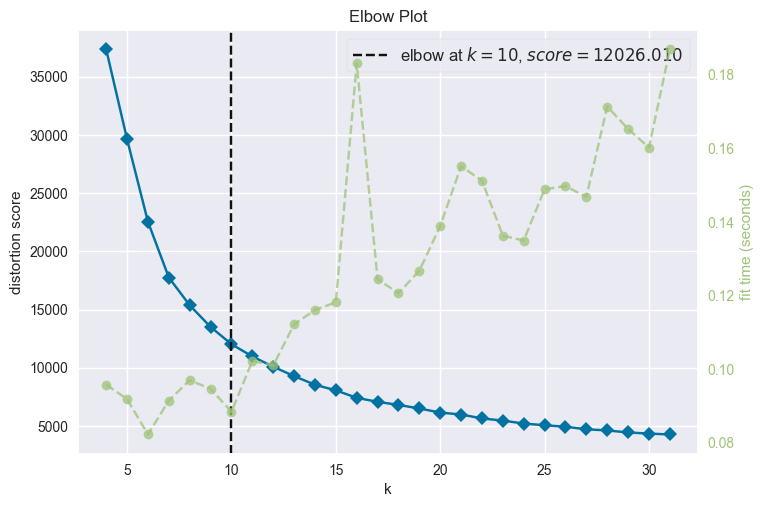

<AxesSubplot: title={'center': 'Elbow Plot'}, xlabel='k', ylabel='distortion score'>

In [375]:
# Instanciamos el modelo
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,32))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.title = 'Elbow Plot'
visualizer.show()      

# Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

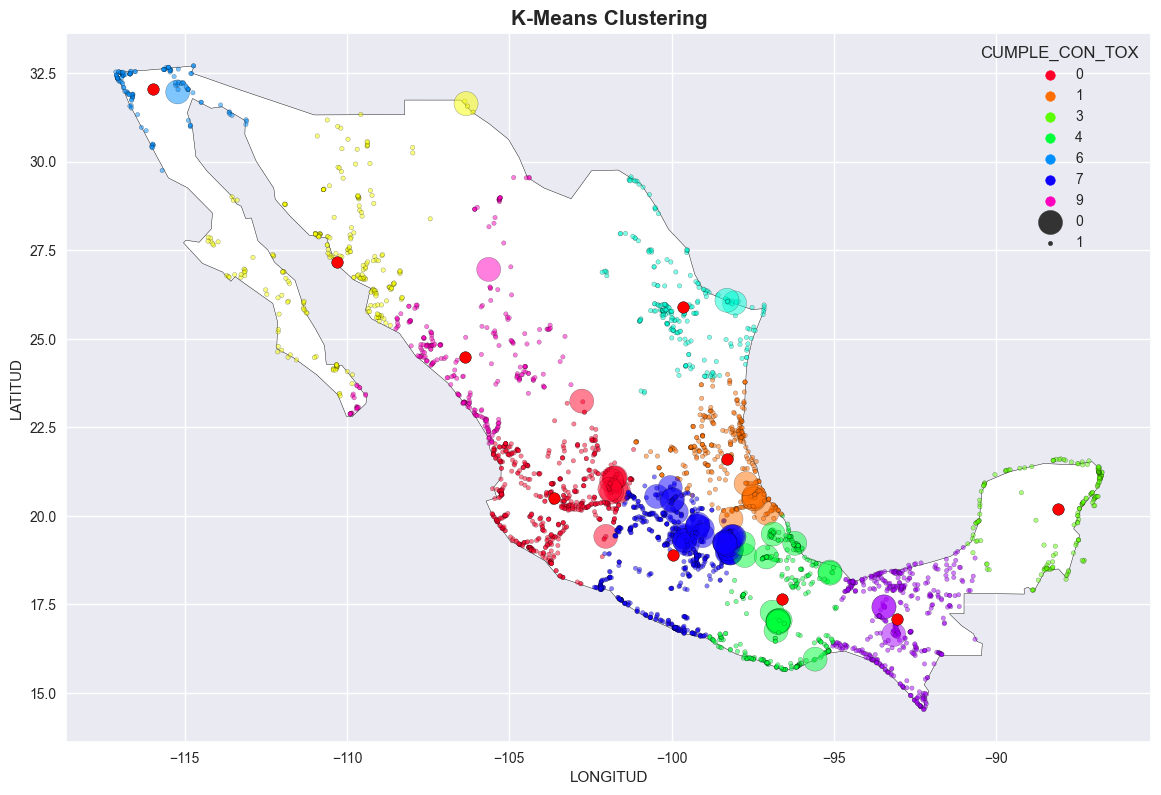

In [419]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
fig, gax = plt.subplots(figsize=(14, 10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(
  x='LONGITUD',
  y='LATITUD',
  data=X,
  hue=y_pred,
  palette='gist_rainbow',
  alpha=0.5,
  size='CUMPLE_CON_TOX',
  sizes=(10, 300),
  edgecolor='black',
)
plt.scatter(
  kmeans.cluster_centers_[:, 0], 
  kmeans.cluster_centers_[:, 1], 
  s=70, 
  c='red', 
  edgecolor='black'
)
plt.title('K-Means Clustering', fontsize=15, weight='bold')
plt.show()


In [423]:
# k = 3
# kmeans = KMeans(n_clusters=k, random_state=42)
# y_pred = kmeans.fit_predict(X[['SEMAFORO']])
# fig, gax = plt.subplots(figsize=(14, 10))

# world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
# sns.scatterplot(
#   x='LONGITUD',
#   y='LATITUD',
#   data=X,
#   hue=y_pred,
#   palette='cool', 
#   alpha=0.5,
#   size='CUMPLE_CON_TOX',
#   sizes=(10, 300),
#   edgecolor='black',
# )
# # plt.scatter(
# #   kmeans.cluster_centers_[:, 0], 
# #   kmeans.cluster_centers_[:, 1], 
# #   s=70, 
# #   c='red', 
# #   edgecolor='black'
# # )
# plt.title('K-Means Clustering Basado en Semáforo de Agua', fontsize=15, weight='bold')
# plt.show()

